In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('delivery_time.csv')

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


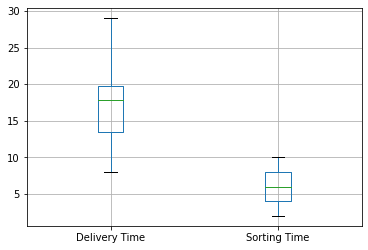

In [9]:
data.boxplot();

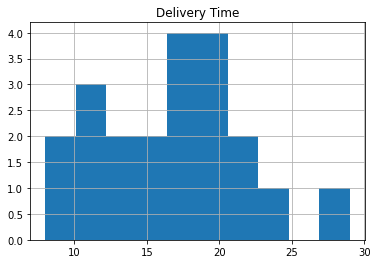

In [10]:
data.hist(['Delivery Time']);

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


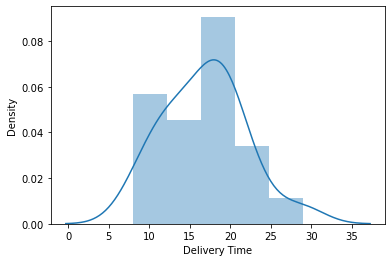

In [11]:
sns.distplot(data['Delivery Time']);

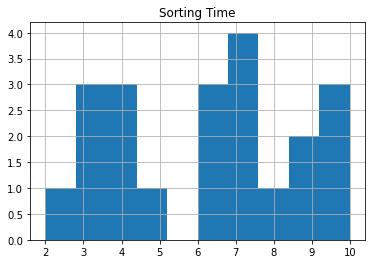

In [12]:
data.hist(['Sorting Time']);

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


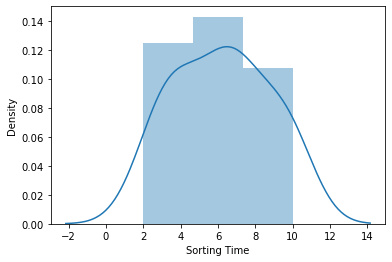

In [13]:
sns.distplot(data['Sorting Time']);

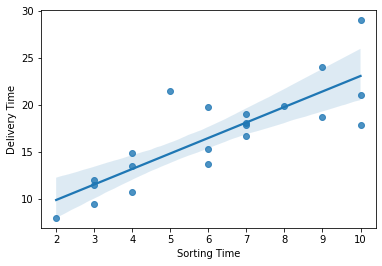

In [14]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time']);

In [15]:
data=data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)

In [16]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [17]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# DATA TRANSFORMATION

In [32]:
data_log = np.log(data['Delivery_Time'])

In [33]:
data_log

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Delivery_Time, dtype: float64

In [34]:
data_sqrt = np.sqrt(data['Delivery_Time'])

In [35]:
data_sqrt

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: Delivery_Time, dtype: float64

In [36]:
data_cbrt = np.cbrt(data['Delivery_Time'])

In [37]:
data_cbrt

0     2.758924
1     2.381102
2     2.703060
3     2.884499
4     3.072317
5     2.485246
6     2.668402
7     2.117912
8     2.615879
9     2.656646
10    2.706705
11    2.207002
12    2.555046
13    2.257179
14    2.291335
15    2.459618
16    2.395710
17    2.626069
18    2.000000
19    2.612465
20    2.780649
Name: Delivery_Time, dtype: float64

PREDICTIONS

In [24]:
model=smf.ols("Sorting_Time~Delivery_Time",data=data).fit()

In [25]:
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [26]:
model.pvalues

Intercept        0.512611
Delivery_Time    0.000004
dtype: float64

In [27]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [28]:
Delivery_Time = (6.582734) + (1.649020)*(5)

In [29]:
new_data=pd.Series([5,8])

In [30]:
data_preds=pd.DataFrame(new_data,columns=['Sorting_Time'])

In [31]:
data_preds

,Sorting_Time
0,5
1,8
